You can find the dataset at the link: https://drive.google.com/file/d/10jUkFWz8cHRoZUrVuPF7Wmcb9MxedtHw/view

Downloading the dataset

In [1]:
import pandas as pd
df = pd.read_csv("facebook_ads_data.csv")
df.head()

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
0,2022-11-05,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
1,2022-11-01,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2,2022-10-31,Expansion,227.45,6054,58,191.87,3.92,37.57,0.009580,0.843570
3,2022-10-30,Expansion,335.91,27562,69,472.61,4.87,12.19,0.002503,1.406954
4,2022-10-29,Expansion,714.03,33358,115,680.34,6.21,21.41,0.003447,0.952817


Groupping the data by the sum of ad spend for the year 2021

In [2]:
# Groupped df by date (2021) according to ad spend
start_date = '2021-01-01'
end_date = '2021-12-31'

# Filter the DataFrame to include only dates within the specified range
filtered_df = df[df['ad_date'].between(start_date, end_date)]

# Group by 'ad_date' and sum 'total_spend'
grouped_by_date = filtered_df.groupby('ad_date')['total_spend'].sum()

# Sort the result by date in ascending order
sorted_by_date = grouped_by_date.sort_index(ascending=True)

sorted_by_date

ad_date
2021-01-01      0.39
2021-01-02      7.74
2021-01-04     70.06
2021-01-05     81.15
2021-01-06    142.77
               ...  
2021-12-27    478.31
2021-12-28    359.83
2021-12-29    163.25
2021-12-30    285.67
2021-12-31    173.38
Name: total_spend, Length: 329, dtype: float64

Finding Moving average of Ad spend and ROMI using the function 'rolling'

In [3]:
# Moving average of Ad spend and ROMI
numeric_columns = df[['total_spend', 'romi']]
rolling_mean = numeric_columns.rolling(3).mean()
rolling_mean.head(10)

,total_spend,romi
0,NaN,NaN
1,NaN,NaN
2,75.816667,NaN
3,187.786667,NaN
4,425.796667,1.067780
5,560.090000,1.098596
6,567.996667,0.978757
7,340.993333,1.135814
8,208.996667,1.185988
9,243.020000,1.093221


Creating the Line chart "Ad spend by days (2021)" using matplotlib

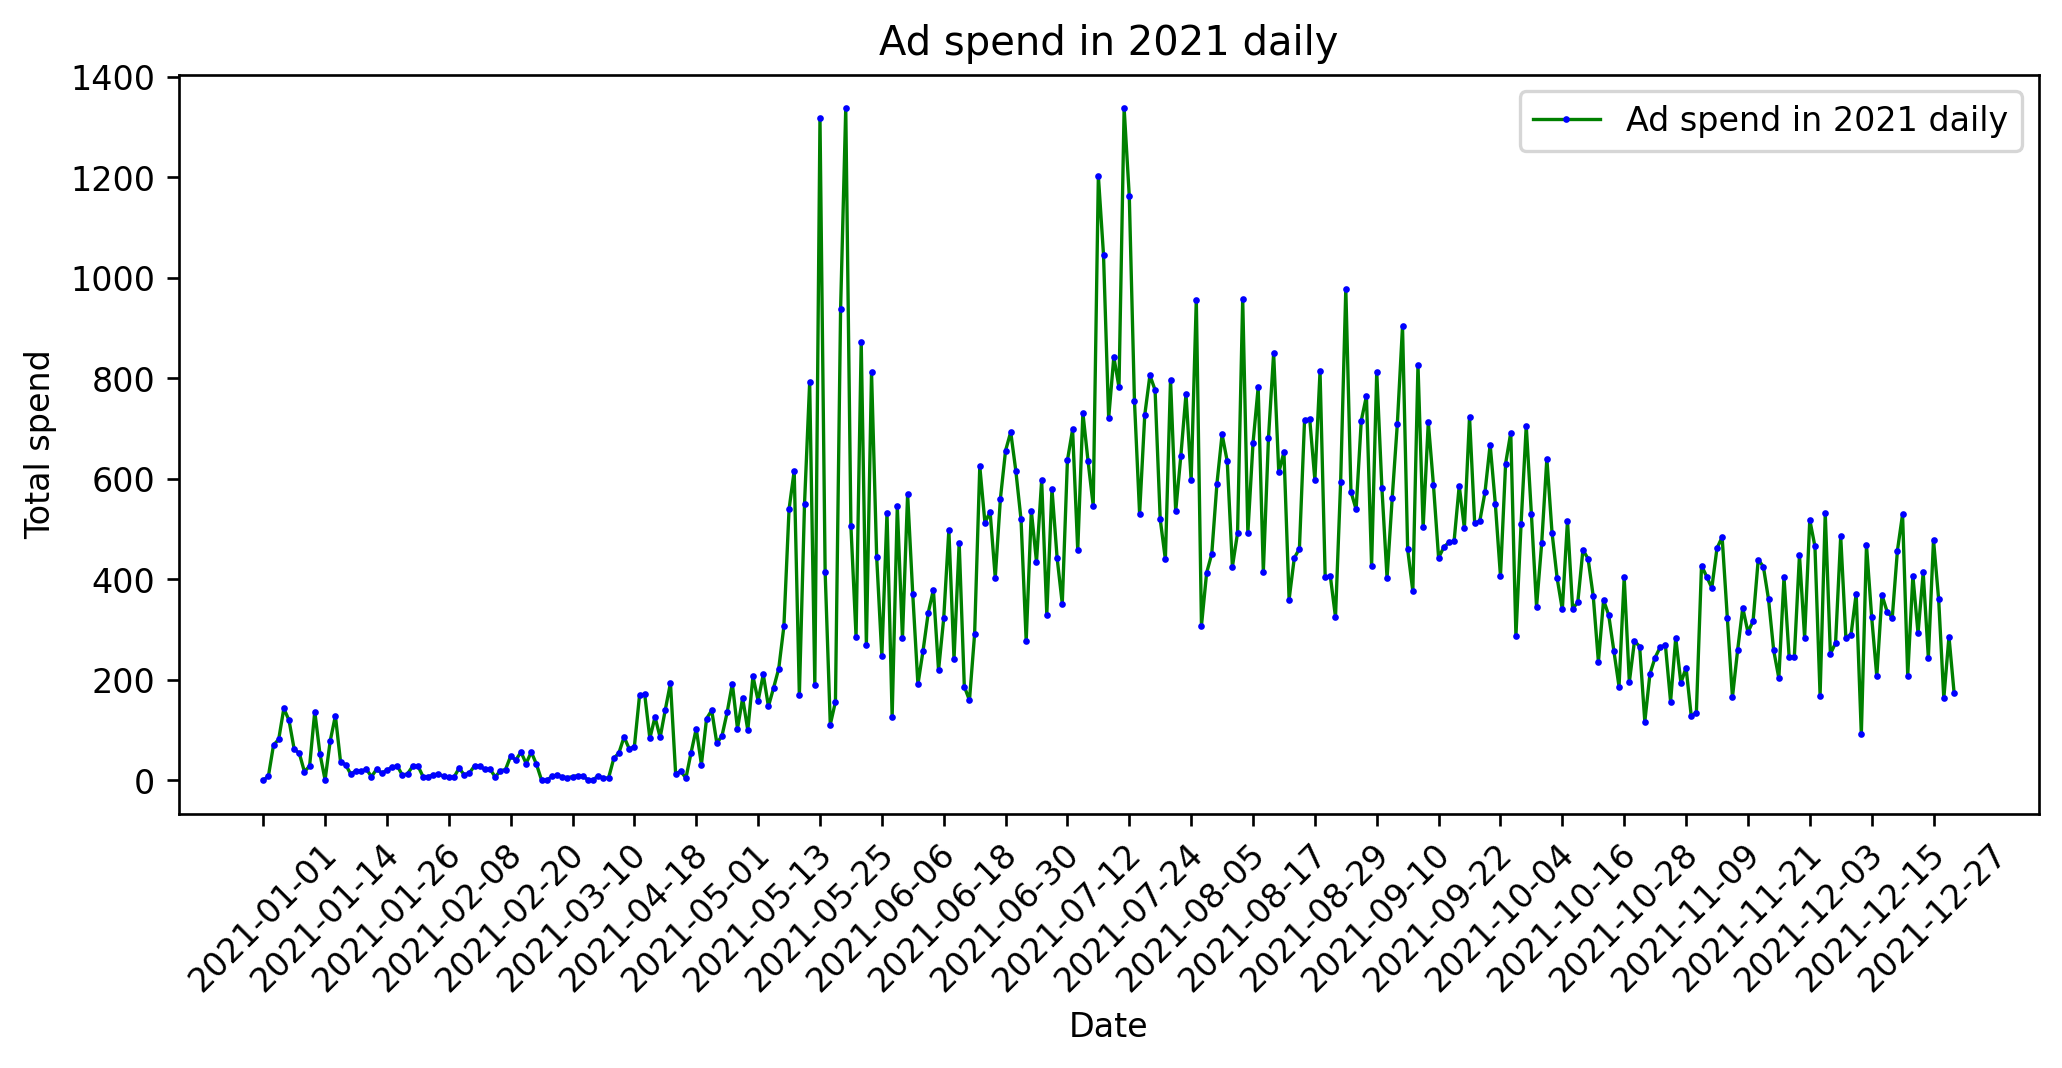

In [4]:
# Line plot "Ad spend by days (2021)"
import matplotlib.pyplot as plt

x = sorted_by_date.index
y = sorted_by_date.values

plt.figure(figsize=(10,4), dpi=240)

plt.plot(
        x,y, 
        label='Ad spend in 2021 daily', 
        color='green', 
        linewidth=1, 
        marker='o', 
        linestyle='-', 
        markersize=1, 
        markeredgecolor='blue'
    )

plt.legend()
plt.title('Ad spend in 2021 daily')
plt.xlabel('Date')
plt.ylabel('Total spend')
plt.xticks(sorted_by_date.index[::12],rotation=45)
plt.show()


In conclusions, you can see that among all campaigns two times were spending more than 1200 per day (May and July).

Groupping the data by the sum of ROMI for the year 2021

In [5]:
# Groupped df by date (2021) according to ROMI

# Group by 'ad_date' and sum 'romi'
grouped_by_date_romi = filtered_df.groupby('ad_date')['romi'].sum()

# Sort the result by date in ascending order
sorted_by_date_romi = grouped_by_date_romi.sort_index(ascending=True)

sorted_by_date_romi

ad_date
2021-01-01    1.512821
2021-01-02    0.891473
2021-01-04    0.977305
2021-01-05    0.760074
2021-01-06    2.022425
                ...   
2021-12-27    4.236782
2021-12-28    4.178221
2021-12-29    3.790408
2021-12-30    3.962574
2021-12-31    4.127073
Name: romi, Length: 329, dtype: float64

Creating the Line chart "ROMI daily (2021)" using matplotlib

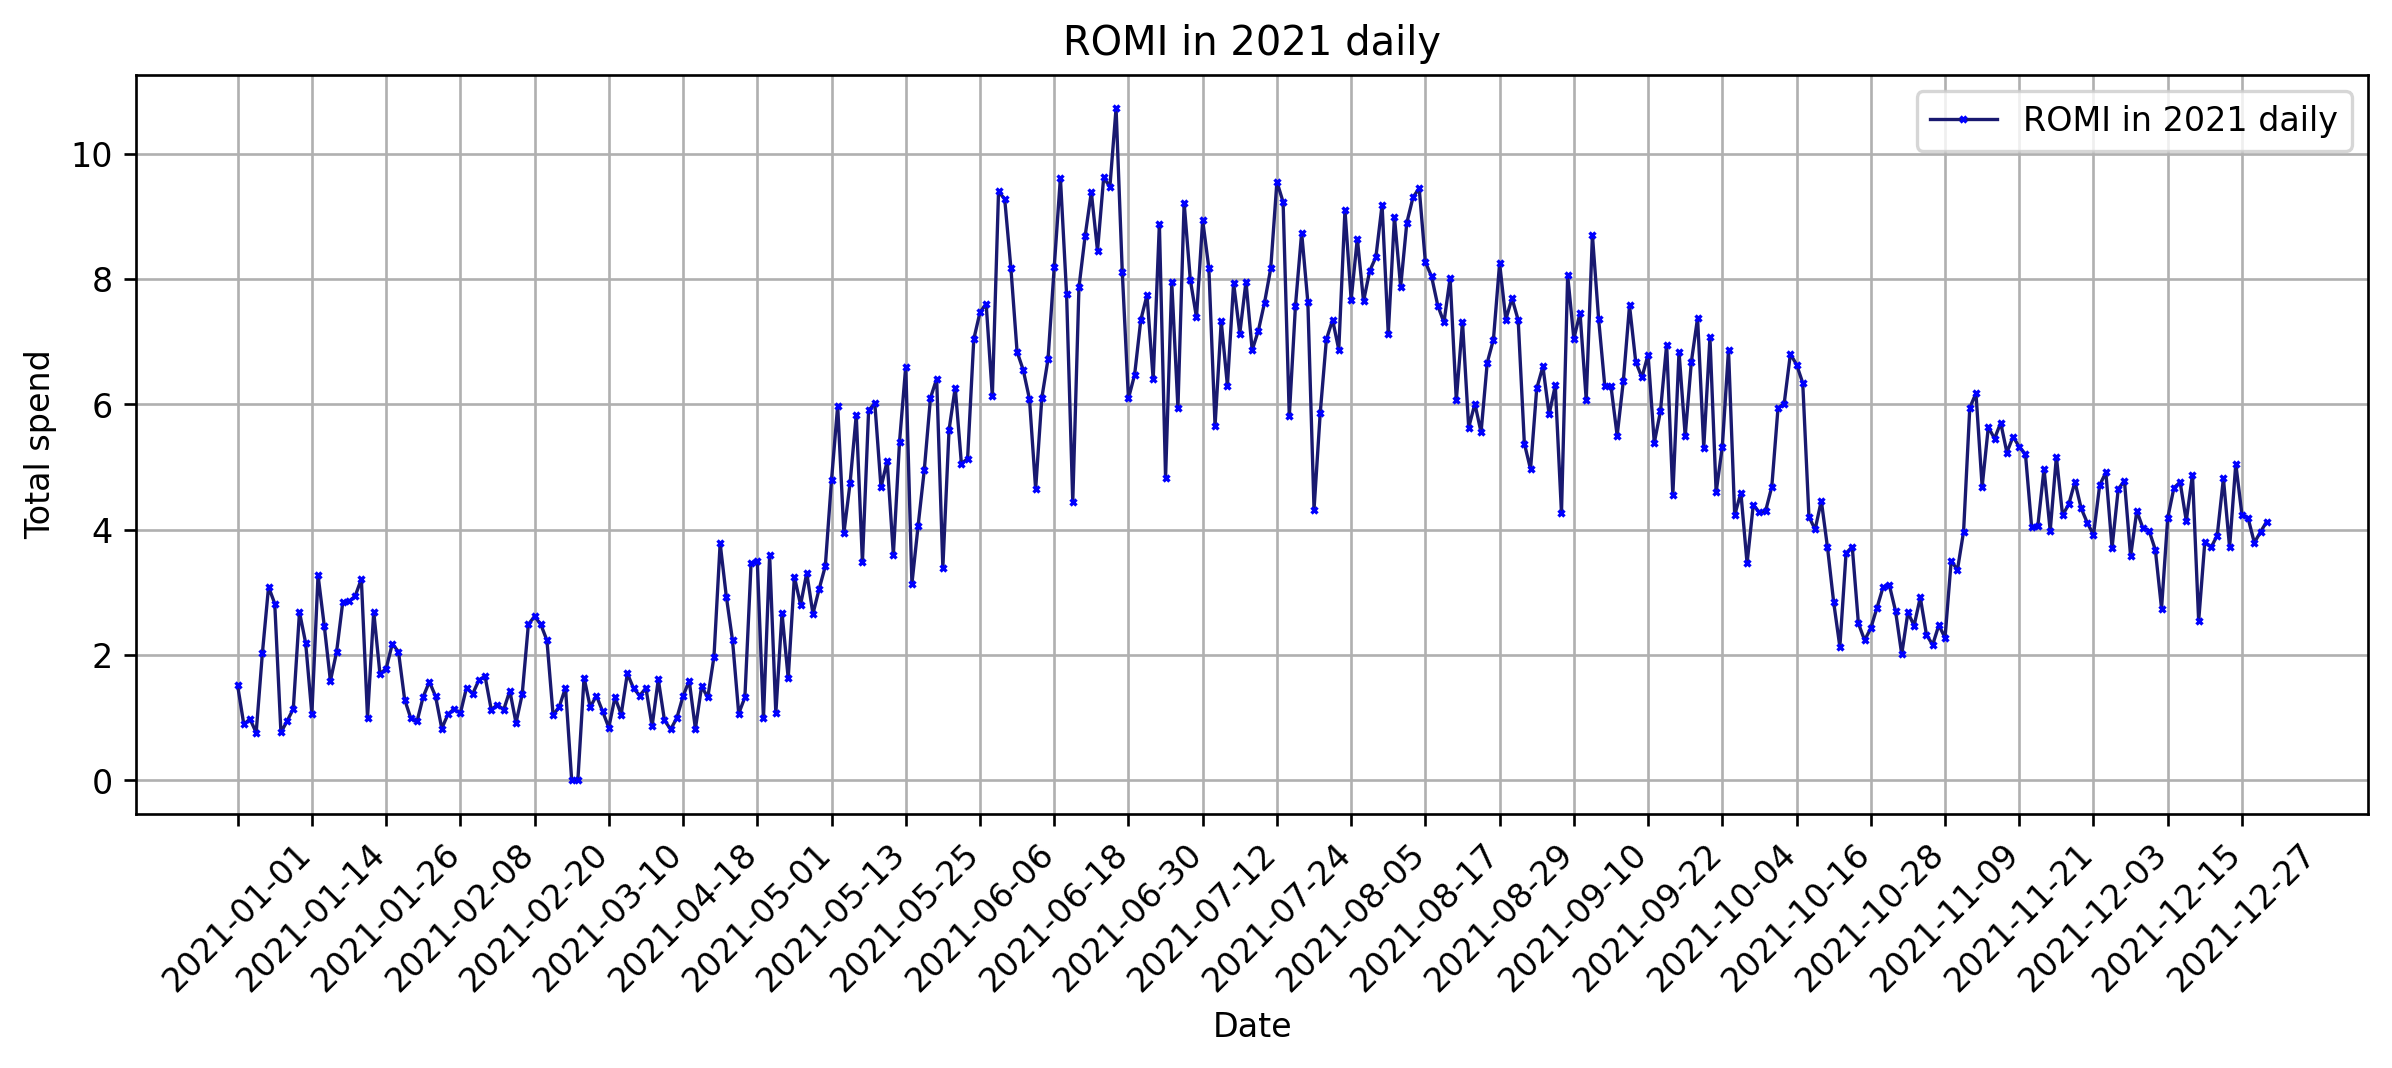

In [6]:
# Line plot "ROMI daily (2021)"
import matplotlib.pyplot as plt

x = sorted_by_date_romi.index
y = sorted_by_date_romi.values

plt.figure(figsize=(12,4), dpi=240)

plt.plot(
        x,y, 
        label='ROMI in 2021 daily', 
        color='midnightblue', 
        linewidth=1, 
        marker='x', 
        linestyle='-', 
        markersize=2, 
        markeredgecolor='blue'
    )

plt.legend()
plt.title('ROMI in 2021 daily')
plt.xlabel('Date')
plt.ylabel('Total spend')
plt.xticks(sorted_by_date.index[::12],rotation=45)
plt.grid()
plt.show()

The biggest values of ROMI you can find in June. Probably, we can observe a direct dependence of ROMI of spending on advertising. 

Comparison of ad spending and average ROMI by campaign name.

In [7]:
# Groupped df by campaign_name
grouped_campaign_name = df.groupby('campaign_name').agg({'total_spend':'sum', 'romi':'mean'})
grouped_campaign_name

,total_spend,romi
campaign_name,,
Brand,539.92,1.241293
Crazy discounts,2175.29,1.208851
Discounts,2856.39,1.247111
Electronics,23920.42,1.225274
Expansion,67212.82,1.237941
Hobbies,11326.97,1.238967
Lookalike,63631.09,1.245056
New items,2936.97,1.279135
Promos,4993.84,1.751932


If you have a look at the table, you find that all advertising campaigns paid off (average ROMI values). Also you can investigate the ad spending by campaigns. 

Creating the chart "Ad spend and ROMI by Campaign name"

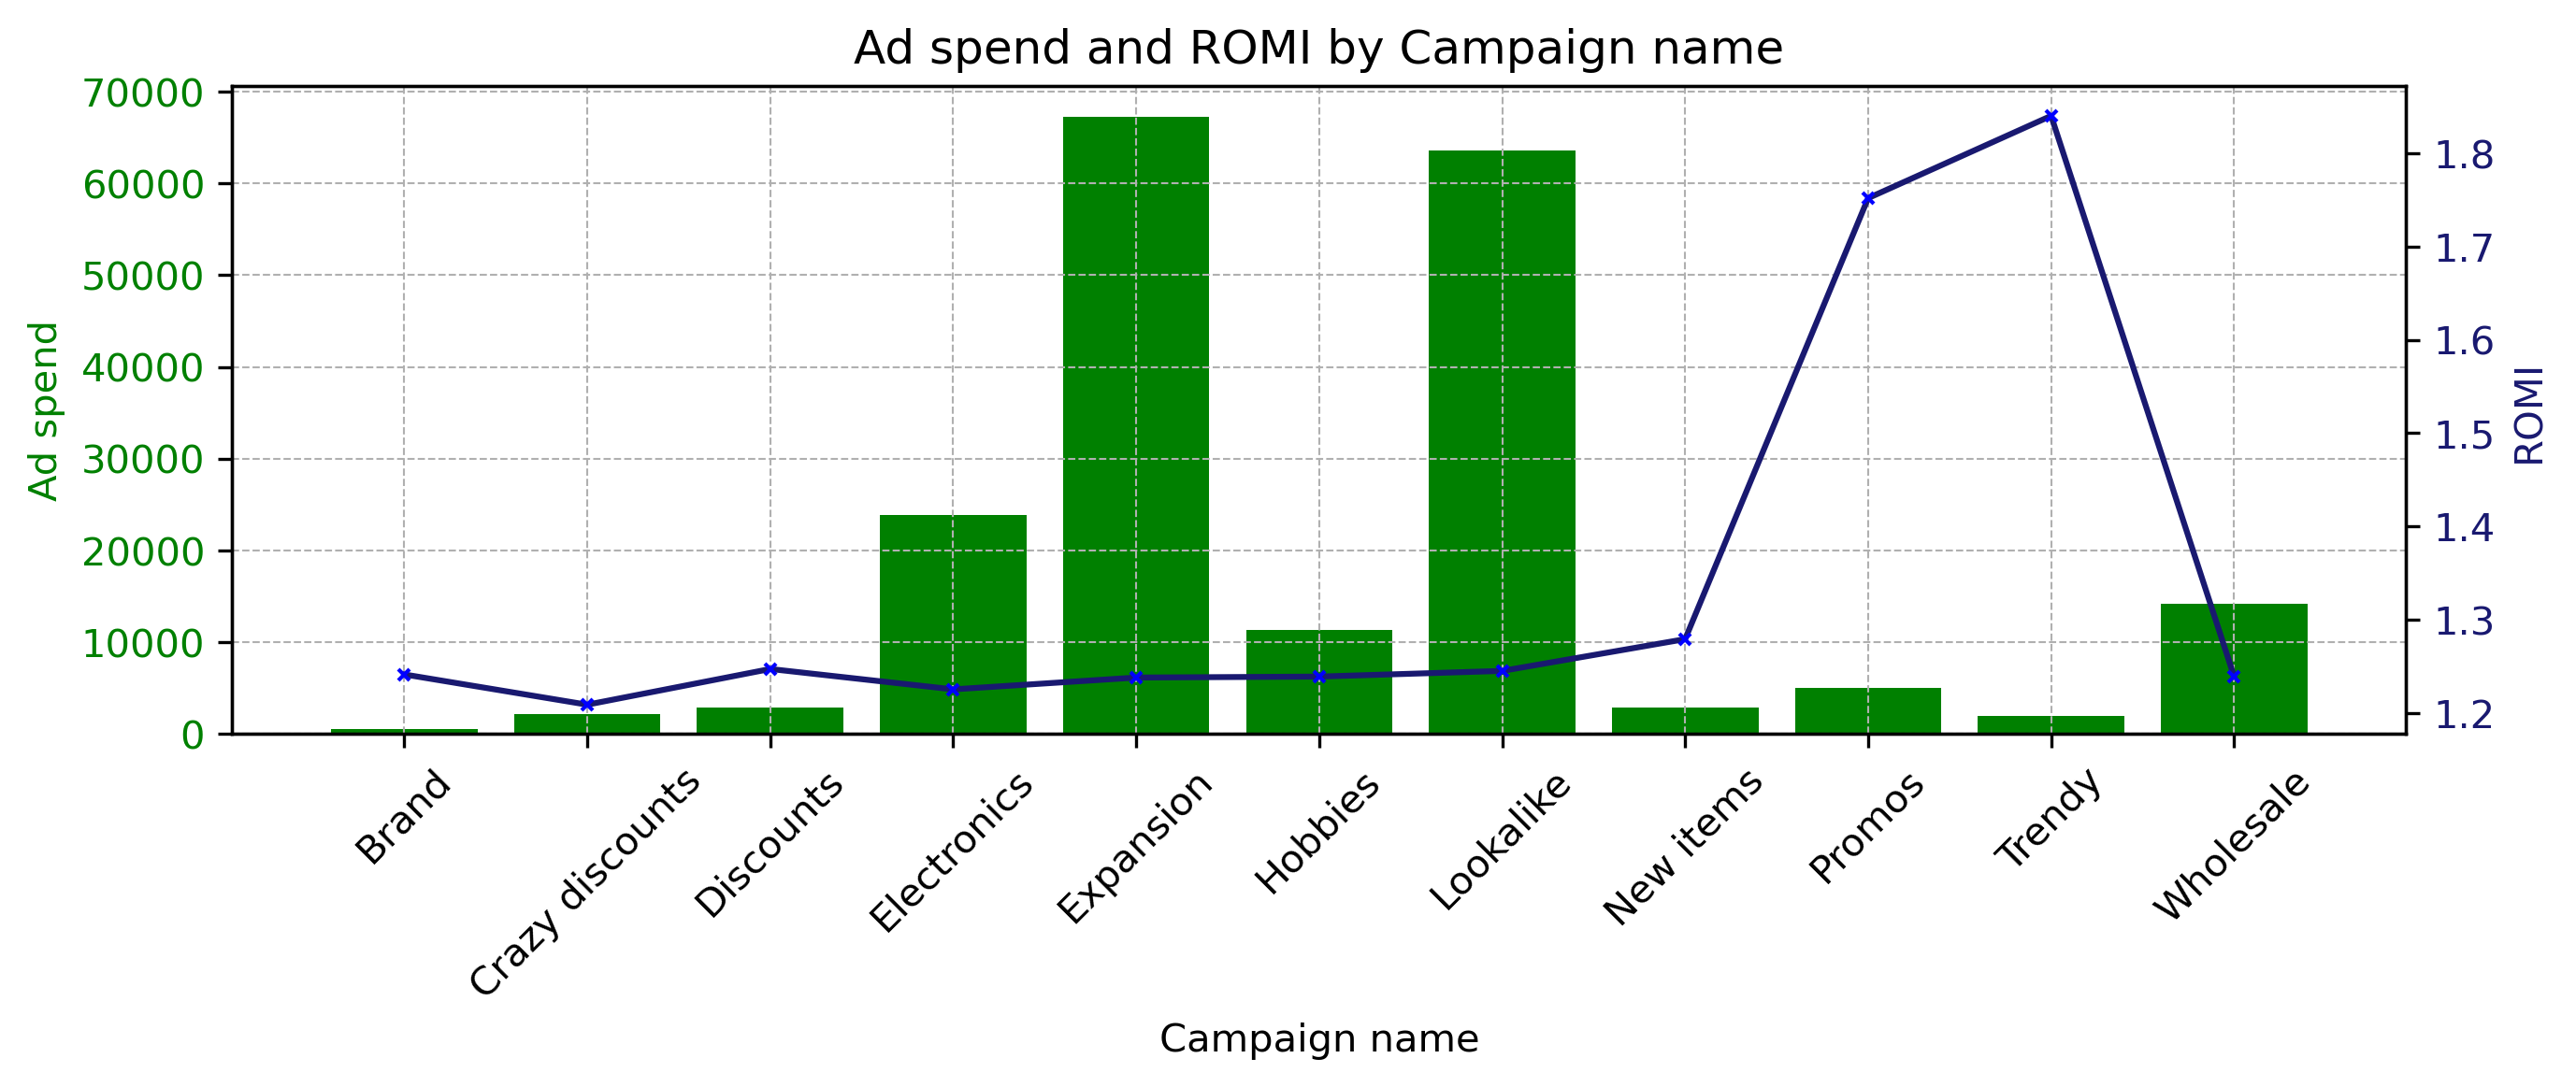

In [8]:
x = grouped_campaign_name.index
y = grouped_campaign_name.values[:,0]

x2 = grouped_campaign_name.index
y2 = grouped_campaign_name.values[:,1]

fig, ax = plt.subplots(figsize=(10,3),dpi=300)
ax.bar(x,y, color='green')
ax.set_title('Ad spend and ROMI by Campaign name')
ax.set_ylabel('Ad spend', color='green')
ax.set_xlabel('Campaign name')
ax.grid(linewidth = 0.5, linestyle = 'dashed')

ax2 = ax.twinx()
ax2.plot(x2,y2,
         color='midnightblue',
         marker='x',
         linestyle='-', 
         markersize=3,
         markeredgecolor='blue')
ax2.set_ylabel("ROMI", color='midnightblue')

for label in ax2.get_yticklabels():
    label.set_color('midnightblue')


for label in ax.get_yticklabels():
    label.set_color('green')
    
ax2.tick_params(axis='y', labelrotation = 0 )
ax.set_xticks(x)
ax.set_xticklabels(x, rotation=45)
plt.show()

As you can see, the most payed off campaigns are 'Promos' and 'Trendy'(look at the top of the blue line). The most spent on next campaigns as 'Expansion' and 'Lookalike' (More than 60 000 $)

Determination the spread of daily ROMI among campaigns using seaborn.

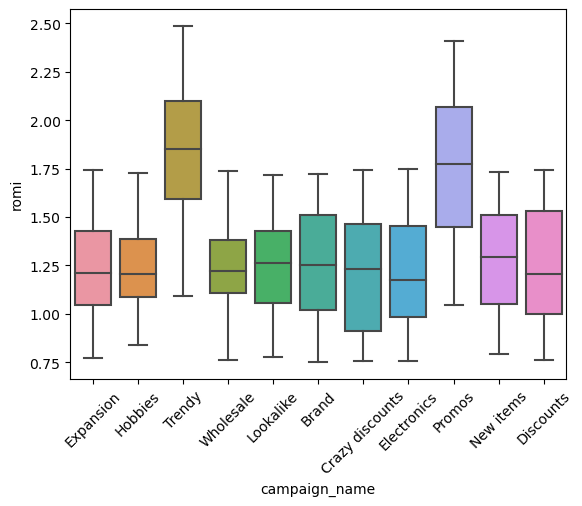

In [9]:
# Building boxplot of daily ROMI scattering among campaigns.
import seaborn as sns
sns.boxplot(x='campaign_name', y='romi', data=df)
plt.xticks(rotation=45)

plt.show()

According to boxplot we found out that the two biggest scattering are next campaigns: 'Trendy', 'Promos'. They include unexpected emissions. The smallest scattering are observed in 'Hobbies' and 'Wholesale'. Therefore, they testify to the stability of the indicator (ROMI) at relatively small costs and can guarantee the liquidity of campaigns.

Creating the histogram chart with the distribution of ROMI values using matplotlib

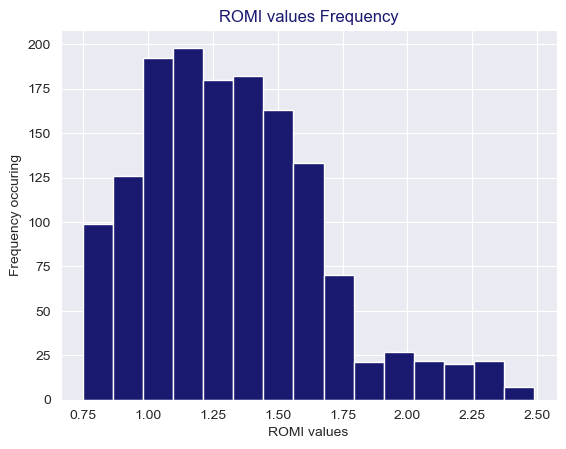

In [10]:
#the histogram chart with the distribution of ROMI values
        
sns.set_style('darkgrid')

plt.hist(df['romi'], bins=15, color='midnightblue')

plt.ylabel('Frequency occuring')
plt.xlabel('ROMI values')
plt.title('ROMI values Frequency', color='midnightblue')
plt.show()

The most common value are in the range from 1 to 1.5 (more than 175 times). This is a good indicator for all campaigns.

The next stage is finding correlations between metrics in Dataset.

I decided to find the correlations among all columns with values using numpy 

In [11]:
import numpy as np
columns = [
    'total_spend',
    'total_impressions',
    'total_clicks',
    'total_value',
    'cpc',
    'cpm',
    'ctr',
    'romi'] # all columns with values
np.triu(np.ones_like(df[columns].corr())) #Returns copy of array with upper part of the triangle

array([[1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

Building the heatmap of correlations

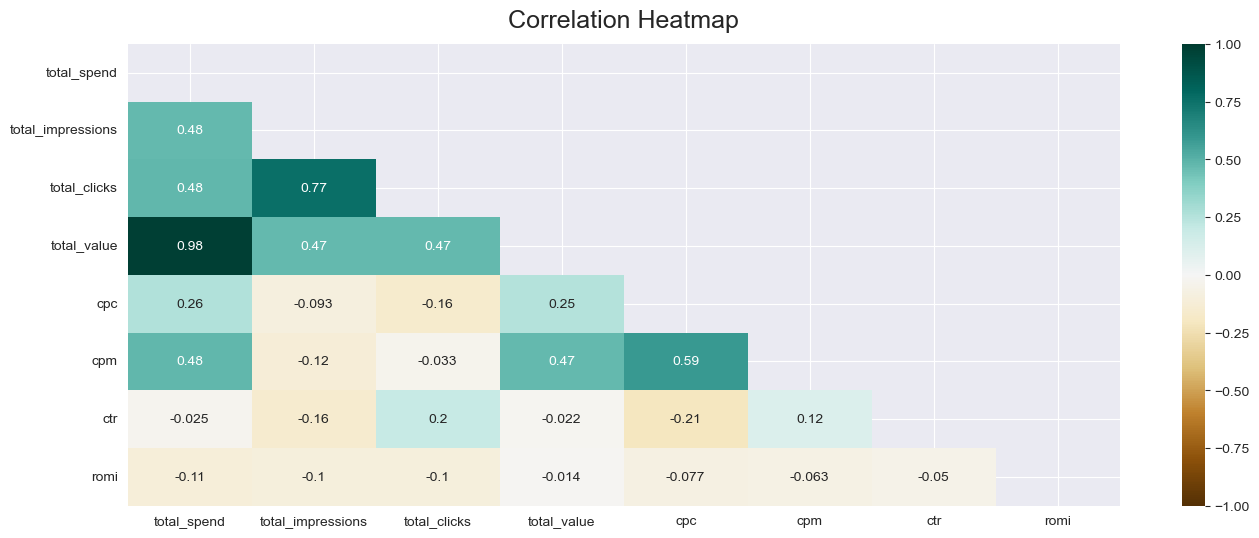

In [12]:
# Correlation Heatmap among all values in DF

plt.figure(figsize=(16, 6))

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df[columns].corr(), dtype=bool))

heatmap = sns.heatmap(df[columns].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

Conclusions: You can have a look at the biggest correlation between income (total value) and ad spend (total spend) = 0.98. It seems that they have the direct connection. The smallest is -0.014 between income (total value) and ROMI. It means that there is no direct dependence.

Creating the linear regression using scatterplot

Text(15.750000000000002, 0.5, 'Total income')

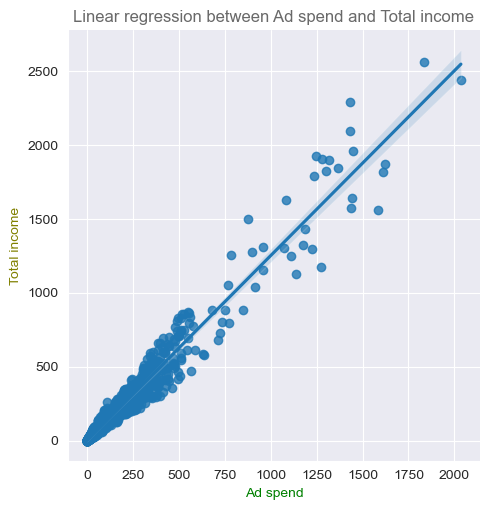

In [13]:
# Linear regression between Ad spend and Total income
sns.lmplot(x="total_spend", y="total_value", data=df)
sns.set_style("darkgrid")

plt.title('Linear regression between Ad spend and Total income', color='dimgray')
plt.xlabel('Ad spend', color='green')
plt.ylabel('Total income', color='olive')

Here you can investigate the direct dependence of the received profit on the money invested in advertising. 